#Homework 5, Jonathan Sganga and Victor Pavao

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [35]:
data = pd.read_csv('temperaturesRaw.csv', parse_dates=['DATE'])

In [36]:
data.shape

(3399, 16)

In [37]:
data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399 entries, 0 to 3398
Data columns (total 16 columns):
STATION            3399 non-null object
NAME               3399 non-null object
LATITUDE           3399 non-null float64
LONGITUDE          3399 non-null float64
ELEVATION          3399 non-null float64
DATE               3399 non-null datetime64[ns]
AWND               409 non-null float64
AWND_ATTRIBUTES    409 non-null object
PRCP               3331 non-null float64
PRCP_ATTRIBUTES    3331 non-null object
TAVG               3261 non-null float64
TAVG_ATTRIBUTES    3290 non-null object
TMAX               3285 non-null float64
TMAX_ATTRIBUTES    3315 non-null object
TMIN               3307 non-null float64
TMIN_ATTRIBUTES    3336 non-null object
dtypes: datetime64[ns](1), float64(8), object(7)
memory usage: 425.0+ KB


In [39]:
clean = data.drop(['STATION', 'ELEVATION','LATITUDE', 'LONGITUDE','NAME','AWND', 'AWND_ATTRIBUTES', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES','TMIN_ATTRIBUTES'], axis = 1)

In [40]:
#Check to see if there are duplicate rows
clean.drop_duplicates()

,DATE,PRCP,TAVG,TMAX,TMIN
0,1948-01-01,4.69,25.9,32.8,19.1
1,1948-02-01,2.84,31.8,40.2,23.3
2,1948-03-01,3.76,43.8,54.5,33.2
3,1948-04-01,3.93,52.0,62.2,41.7
4,1948-05-01,7.41,61.9,71.3,52.5
5,1948-06-01,4.94,71.1,81.2,61.0
6,1948-07-01,1.90,76.4,85.9,66.8
7,1948-08-01,5.96,74.6,83.9,65.3
8,1948-09-01,2.09,67.7,78.4,57.0
9,1948-10-01,1.53,55.2,64.0,46.5


In [41]:
#Remove explicitly invalid temperature data
clean = clean[clean['TMIN'] < clean['TMAX']]
clean = clean[clean['TAVG'] < clean['TMAX']]
clean = clean[clean['TAVG'] > clean['TMIN']]

In [42]:
#Fill in the rows that have one NaN value
for row in clean.iterrows() :
    if(['TMIN'] is None and ['TMAX'] is not None and ['TAVG'] is not None) :
        row['TMIN'] = row['TAVG'] - (row['TMAX'] - row['TAVG'])
    if(['TMAX'] is None and ['TMIN'] is not None and ['TAVG'] is not None) :
        row['TMAX'] = row['TAVG'] + (row['TAVG'] - row['TMIN'])
    if(['TAVG'] is None and ['TMIN'] is not None and ['TMAX'] is not None) :
        row['TAVG'] = row['TMIN'] + row['TMAX'] / 2

In [43]:
clean.dropna() #Drop a row if more than 2 attributes are null, joint decision to do this

,DATE,PRCP,TAVG,TMAX,TMIN
0,1948-01-01,4.69,25.9,32.8,19.1
1,1948-02-01,2.84,31.8,40.2,23.3
2,1948-03-01,3.76,43.8,54.5,33.2
3,1948-04-01,3.93,52.0,62.2,41.7
4,1948-05-01,7.41,61.9,71.3,52.5
5,1948-06-01,4.94,71.1,81.2,61.0
6,1948-07-01,1.90,76.4,85.9,66.8
7,1948-08-01,5.96,74.6,83.9,65.3
8,1948-09-01,2.09,67.7,78.4,57.0
9,1948-10-01,1.53,55.2,64.0,46.5


In [44]:
clean.info()
#Looks like we got rid of 800 columns with incomplete or blatantly incorrect data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3139 entries, 0 to 3398
Data columns (total 5 columns):
DATE    3139 non-null datetime64[ns]
PRCP    3079 non-null float64
TAVG    3139 non-null float64
TMAX    3139 non-null float64
TMIN    3139 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 147.1 KB


In [45]:
#Sort values by date to see dates with multiple temperature records
clean.sort_values(by='DATE')

,DATE,PRCP,TAVG,TMAX,TMIN
2198,1893-01-01,2.62,21.1,30.0,12.3
841,1893-01-01,NaN,21.3,28.5,14.1
2199,1893-02-01,5.54,30.9,38.7,23.2
842,1893-02-01,6.13,30.2,38.0,-84.7
843,1893-04-01,5.02,51.7,61.7,-68.2
844,1893-05-01,4.18,59.5,69.0,50.0
845,1893-06-01,2.59,70.8,79.7,61.9
846,1893-07-01,NaN,74.4,83.5,65.3
847,1893-08-01,3.65,73.7,83.0,64.4
848,1893-09-01,2.58,64.1,72.9,55.3


In [46]:
#Make seperate columns for date features
clean['YEAR'] = pd.to_datetime(clean['DATE'], format='%Y-%m-%d').dt.year
clean['MONTH'] = pd.to_datetime(clean['DATE'], format='%Y-%m-%d').dt.month
clean['DAY'] = pd.to_datetime(clean['DATE'], format='%Y-%m-%d').dt.day

In [47]:
clean.sort_values(by=['YEAR', 'MONTH', 'DAY'])

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,DAY
841,1893-01-01,NaN,21.3,28.5,14.1,1893,1,1
2198,1893-01-01,2.62,21.1,30.0,12.3,1893,1,1
842,1893-02-01,6.13,30.2,38.0,-84.7,1893,2,1
2199,1893-02-01,5.54,30.9,38.7,23.2,1893,2,1
843,1893-04-01,5.02,51.7,61.7,-68.2,1893,4,1
844,1893-05-01,4.18,59.5,69.0,50.0,1893,5,1
845,1893-06-01,2.59,70.8,79.7,61.9,1893,6,1
846,1893-07-01,NaN,74.4,83.5,65.3,1893,7,1
847,1893-08-01,3.65,73.7,83.0,64.4,1893,8,1
848,1893-09-01,2.58,64.1,72.9,55.3,1893,9,1


In [48]:
#New data set that averages over the year
clean = clean.groupby('YEAR').mean()
#Fix 1914's skewed data
clean.set_value(1914, 'TMIN', (clean.get_value(1913, 'TMIN') + clean.get_value(1915, 'TMIN'))/2)
clean.set_value(1914, 'TMAX', (clean.get_value(1913, 'TMAX') + clean.get_value(1915, 'TMAX'))/2)
clean.set_value(1914, 'TAVG', (clean.get_value(1913, 'TAVG') + clean.get_value(1915, 'TAVG'))/2)
#Fix 2018's skewed data
clean.set_value(2018, 'TMIN', (clean.get_value(2017, 'TMIN')))
clean.set_value(2018, 'TMAX', (clean.get_value(2017, 'TMAX')))
clean.set_value(2018, 'TAVG', (clean.get_value(2017, 'TAVG')))

,PRCP,TAVG,TMAX,TMIN,MONTH,DAY
YEAR,,,,,,
1893,4.038750,49.625000,58.308333,22.883333,5.500000,1.0
1894,4.114375,55.709524,64.661905,46.733333,6.761905,1.0
1895,2.995000,48.315385,57.169231,39.469231,4.923077,1.0
1896,3.699091,52.841667,61.183333,44.516667,6.500000,1.0
1897,3.510909,52.466667,60.783333,44.141667,6.500000,1.0
1898,4.418333,53.700000,61.925000,45.491667,6.500000,1.0
1899,3.772000,50.772727,59.300000,31.736364,6.545455,1.0
1900,3.924444,56.209091,64.927273,47.490909,6.909091,1.0
1901,4.696667,51.950000,60.066667,43.841667,6.500000,1.0


<IPython.core.display.Javascript object>


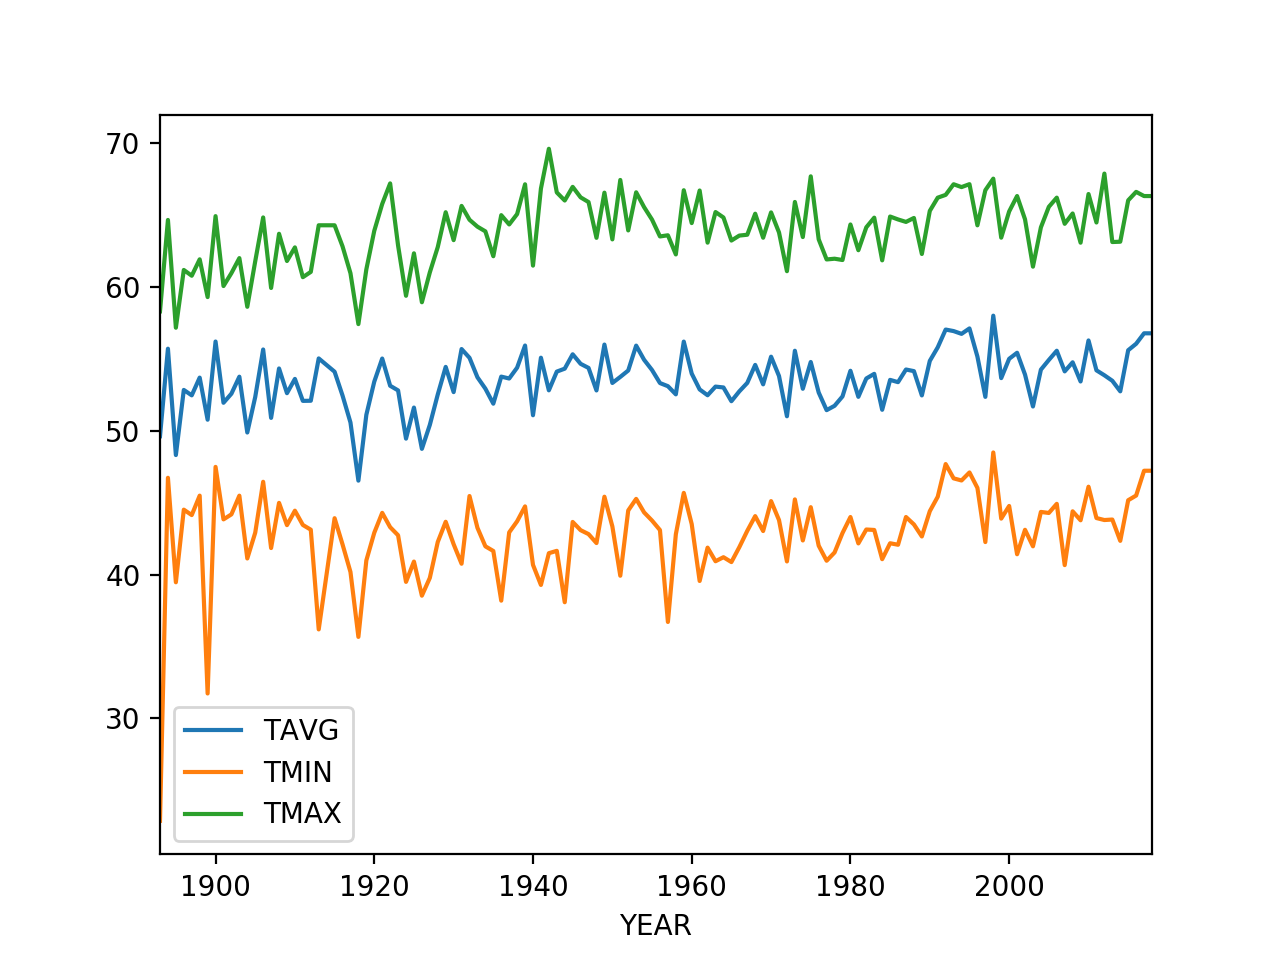

In [49]:
#Graphs
clean['TAVG'].plot(kind ="line", legend = "true")
clean['TMIN'].plot(kind = "line", legend = "true")
clean['TMAX'].plot(kind = "line", legend = "true")

In [50]:
clean.boxplot(['TMIN', 'TAVG', 'TMAX'])